In this puzzle, the challenge is to pick three distinct positive integers, A, B, and C, and place them on a 6x6 grid. The objective is to complete two knight’s tours: one from a1 to f6 and the other from a6 to f1, both achieving a total score of exactly 2024 points.


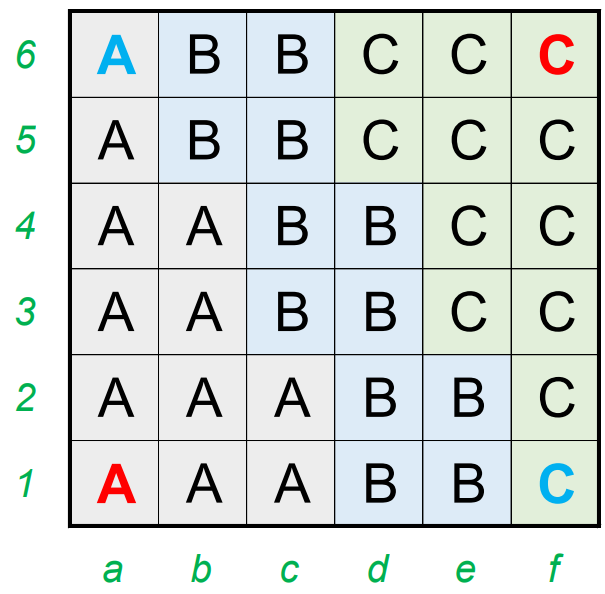

The rules for scoring are:

	•	Start with A points.
	•	For each move:
	•	If the move transitions between different integers, multiply the score by the value moved to.
	•	If the move remains within the same integer value, increment the score by that value.

The puzzle asks you to find values for A, B, and C (with A + B + C less than 50) along with valid knight’s tours that meet the scoring criteria.

For more details, check out the puzzle at Jane Street’s puzzle page ￼. https://www.janestreet.com/puzzles/current-puzzle/

In [3]:
from collections import defaultdict
from typing import List, Set, Tuple
import matplotlib.pyplot as plt
import numpy as np


### Knight Puzzle Solver

This section introduces the `KnightPuzzleSolver` class, which implements an algorithm to find valid knight paths on a 6x6 chess grid. The goal is to explore paths that satisfy specific score constraints based on grid values (A, B, and C), while using a combination of depth-first search (DFS) and backtracking to prune invalid paths.

Key components of the solver include:
- **Precomputing Knight Moves:** Efficiently calculates all valid knight moves from each grid position.
- **Score Calculation:** Tracks and updates the score dynamically as the knight traverses different grid cells.
- **Pathfinding with DFS:** Searches for all valid paths from a starting position to a target, ensuring the score remains within the set limits.

In [99]:

class KnightPuzzleSolver:
    def __init__(self, target_score: int = 2024):
        self.target_score = target_score
        self.grid = {}
        self.rows = 6
        self.cols = 6
        self.knight_moves = self.precompute_knight_moves()




    def precompute_knight_moves(self):
        """Precompute all possible knight moves for each grid position"""
        moves = {}
        for row in range(1, self.rows + 1):
            for col in range(1, self.cols + 1):
                pos = (row, col)
                moves[pos] = self.get_knight_moves(pos)
        return moves


    def get_knight_moves(self, pos: Tuple[int, int]) -> List[Tuple[int, int]]:
        """Get all possible knight moves from the given position"""
        row, col = pos
        move_offsets = [
            (2, 1), (2, -1), (-2, 1), (-2, -1),
            (1, 2), (1, -2), (-1, 2), (-1, -2)
        ]
        return [(row + dr, col + dc) for dr, dc in move_offsets if 1 <= row + dr <= self.rows and 1 <= col + dc <= self.cols]

    def initialize_grid(self, A: int, B: int, C: int):
        """Initialize the grid with the given values of A, B, and C"""
        self.grid = {
            (1,1): A, (1,2): A, (1,3): A, (1,4): B, (1,5): B, (1,6): C,
            (2,1): A, (2,2): A, (2,3): A, (2,4): B, (2,5): B, (2,6): C,
            (3,1): A, (3,2): A, (3,3): B, (3,4): B, (3,5): C, (3,6): C,
            (4,1): A, (4,2): A, (4,3): B, (4,4): B, (4,5): C, (4,6): C,
            (5,1): A, (5,2): B, (5,3): B, (5,4): C, (5,5): C, (5,6): C,
            (6,1): A, (6,2): B, (6,3): B, (6,4): C, (6,5): C, (6,6): C
        }



    def calculate_score_incrementally(self, path: List[Tuple[int, int]]) -> int:
        """Calculate score while traversing the path, stop early if score exceeds target"""
        score = self.grid[path[0]]
        for i in range(1, len(path)):
            curr_val = self.grid[path[i]]
            prev_val = self.grid[path[i - 1]]
            if curr_val != prev_val:
                score *= curr_val
            else:

                score += curr_val
            if score > self.target_score:  # early termination
                return -1
        return score


    def find_knight_paths(self, start: Tuple[int, int], end: Tuple[int, int], max_depth: int = 10) -> List[List[Tuple[int, int]]]:
        """Find all paths via DFS with score pruning"""
        paths = []
        
        def dfs(current: Tuple[int, int], path: List[Tuple[int, int]], current_score: int):
            if len(path) > max_depth or current_score > self.target_score:
                return
            
            if current == end:
                if current_score == self.target_score:
                    paths.append(path[:])
                return

            for next_pos in self.knight_moves[current]:
                if next_pos not in path:
                    new_score = current_score
                    curr_val = self.grid[next_pos]
                    prev_val = self.grid[current]

                    if curr_val != prev_val:
                        new_score *= curr_val
                    else:
                        new_score += curr_val
                    
                    if new_score > self.target_score:
                        continue
                    
                    path.append(next_pos)
                    dfs(next_pos, path, new_score)
                    path.pop()
        
        dfs(start, [start], self.grid[start])
        return  paths


    def format_path(self, path: List[Tuple[int, int]]) -> str:
        """Convert path coordinates to chess notation (a1, b3, etc.)"""
        return ','.join(f"{chr(96+c)}{r}" for r, c in path)

    def solve(self, max_value: int = 20) -> List[str]:
        """Find all solutions with A + B + C < 50 and paths that meet the target score"""
        solutions = []

        # Try different combinations of A, B, C
        for A in range(1, max_value):
            for B in range(A + 1, max_value):
                for C in range(B + 1, max_value):
                    if A + B + C >= 50:
                        continue


                    self.initialize_grid(A, B, C)

                    # Find paths for both required routes
                    paths_1 = self.find_knight_paths((1, 1), (6, 6))  # a1 to f6
                    paths_2 = self.find_knight_paths((6, 1), (1, 6))  # f1 to a6

                    for path1 in paths_1:
                        for path2 in paths_2:
                            solution = f"{A},{B},{C},{self.format_path(path1)},{self.format_path(path2)}"
                            solutions.append((A + B + C, solution))


        # Sort by  A + B + C
        return [sol[1] for sol in sorted(solutions)]



In [100]:

# solver instance and find solutions
solver = KnightPuzzleSolver(2024)
solutions = solver.solve()

if solutions:
    print(" solutions (sorted by A+B+C):")
    for sol in solutions:
        print(sol)
else:
    print("No solutions .")

 solutions (sorted by A+B+C):
2,6,8,a1,c2,e3,d5,b6,c4,d2,e4,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
2,6,8,a1,c2,e3,f1,d2,c4,b6,d5,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
2,6,8,a1,c2,e3,f5,d4,b5,c3,d5,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
2,6,8,a1,c2,e3,f5,d4,b5,c3,e4,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
2,6,8,a1,c2,e3,f5,d4,e2,c3,d5,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
2,6,8,a1,c2,e3,f5,d4,e2,c3,e4,f6,a6,b4,d5,f4,e2,c3,d1,e3,f1
4,7,8,a1,b3,c5,d3,b4,d5,f6,a6,b4,c6,d4,c2,e3,f1
4,7,8,a1,b3,c5,d3,b4,d5,f6,a6,b4,d3,e1,c2,e3,f1
4,7,8,a1,b3,d4,c6,b4,d5,f6,a6,b4,c6,d4,c2,e3,f1
4,7,8,a1,b3,d4,c6,b4,d5,f6,a6,b4,d3,e1,c2,e3,f1
4,7,8,a1,c2,d4,c6,b4,d5,f6,a6,b4,c6,d4,c2,e3,f1
4,7,8,a1,c2,d4,c6,b4,d5,f6,a6,b4,d3,e1,c2,e3,f1
4,7,8,a1,c2,e1,d3,b4,d5,f6,a6,b4,c6,d4,c2,e3,f1
4,7,8,a1,c2,e1,d3,b4,d5,f6,a6,b4,d3,e1,c2,e3,f1
3,6,11,a1,b3,a5,c6,d4,c2,b4,d5,f6,a6,b4,a2,c3,b5,a3,c2,e3,f1
3,6,11,a1,b3,c1,d3,c5,a6,b4,d5,f6,a6,b4,a2,c3,b5,a3,c2,e3,f1
3,6,11,a1,b3,c1,d3,e1,c2,b4,d5,f6,a6,b4,a2,c3,b5,a3,c2,e3,f1
3,6,11,a1,b3,c1,e2,c3,a2,b4,d5,f6,a6,b4,a2,

## visual

In [8]:


def compute_scores(A, B, C, path):
    # value grid
    value_grid = [
        [A, B, B, C, C, C],
        [A, B, B, C, C, C],
        [A, A, B, B, C, C],
        [A, A, B, B, C, C],
        [A, A, A, B, B, C],
        [A, A, A, B, B, C]
    ]
    
    def notation_to_coord(notation):
        col = ord(notation[0]) - ord('a')
        row = 6 - int(notation[1])  
        return col, row
    
    scores = []
    current_score = value_grid[notation_to_coord(path[0])[1]][notation_to_coord(path[0])[0]]
    #print(current_score)
    scores.append(current_score)
    
    for i in range(1, len(path)):
        prev_x, prev_y = notation_to_coord(path[i-1])
        curr_x, curr_y = notation_to_coord(path[i])
        prev_value = value_grid[prev_y][prev_x]
        curr_value = value_grid[curr_y][curr_x]
        
        if prev_value != curr_value:
            current_score *= curr_value
        else:
            current_score += curr_value
        scores.append(current_score)
    
    return scores

def create_board_visualization(A, B, C, path1, path2):
    fig, ax = plt.subplots(figsize=(8, 9))
    
    
    grid = [
        [A, B, B, C, C, C],
        [A, B, B, C, C, C],
        [A, A, B, B, C, C],
        [A, A, B, B, C, C],
        [A, A, A, B, B, C],
        [A, A, A, B, B, C]
    ]

    # colors of regions
    colors = {A: '#FFCC00',  
            B: '#0099FF',  
            C: '#FF6666'}  
        
    # Draw grid cells 
    for i in range(6):
        for j in range(6):
            value = grid[i][j]
            ax.add_patch(plt.Rectangle((j, 5-i), 1, 1, facecolor=colors[value], edgecolor='black'))
            ax.text(j + 0.5, 5-i + 0.5, str(value), ha='center', va='center', fontsize=12)

    def notation_to_coord(notation):
        col = ord(notation[0]) - ord('a')
        row = 6 - int(notation[1]) 
        return col, row

    # scores 
    path1_list = path1.split(',')
    path2_list = path2.split(',')
    scores1 = compute_scores(A, B, C, path1_list)
    scores2 = compute_scores(A, B, C, path2_list)


    def plot_path(path, scores, color, linestyle='-'):
        coords = [notation_to_coord(p) for p in path]
        x_coords = [x + 0.5 for x, _ in coords]
        y_coords = [5-y + 0.5 for _, y in coords]
        
      
        plt.plot(x_coords, y_coords, color=color, linestyle=linestyle, linewidth=2, 
                marker='o', markersize=8, zorder=2)
        
        # arrows and scores
        for i in range(len(coords)-1):
            dx = x_coords[i+1] - x_coords[i]
            dy = y_coords[i+1] - y_coords[i]
            mid_x = x_coords[i] + dx/2
            mid_y = y_coords[i] + dy/2
  
            plt.arrow(x_coords[i], y_coords[i], dx*0.4, dy*0.4, 
                     head_width=0.1, head_length=0.2, fc=color, ec=color, zorder=3)
            
            plt.text(mid_x, mid_y + 0.2, f'{scores[i+1]}', 
                    color=color, ha='center', va='bottom', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor=color, alpha=0.7))

    plot_path(path1_list, scores1, 'blue', '-')
    plot_path(path2_list, scores2, 'red', '--')

   
    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-0.5, 6.5)
    ax.set_xticks(range(6))
    ax.set_yticks(range(6))
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6'])
    

    plt.plot([], [], color='blue', label=f'Path 1 (a1 to f6)  Final Score: {scores1[-1]}', linewidth=2)
    plt.plot([], [], color='red', label=f'Path 2 (a6 to f1)  Final Score: {scores2[-1]}', linewidth=2, linestyle='--')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))


    plt.title(f'Knight\'s  Paths Solution (A={A}, B={B}, C={C})', pad=20)
    
    plt.tight_layout()
    return fig

def visualize_solution(solution_string):
    parts = solution_string.split(',')
    A, B, C = map(int, parts[:3])
    
    f6_index = parts.index('f6')
    path1 = ','.join(parts[3:f6_index+1])
    path2 = ','.join(parts[f6_index+1:])
    
    return create_board_visualization(A, B, C, path1, path2)


<Figure size 1200x1200 with 0 Axes>

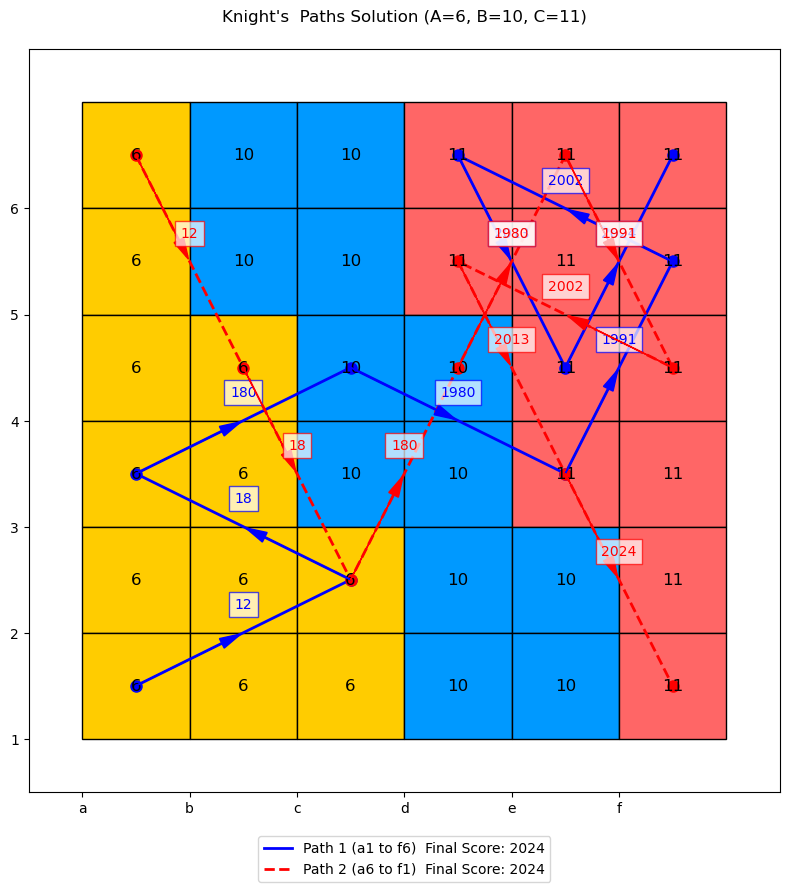

In [9]:

# last solution on the list
solution = "6,10,11,a1,c2,a3,c4,e3,f5,d6,e4,f6,a6,b4,c2,d4,e6,f4,d5,e3,f1"
plt.figure(figsize=(12, 12))
visualize_solution(solution)
plt.show()
